<a href="https://colab.research.google.com/github/deejay14/Jhakas-NewsWala/blob/main/click_stream_final_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import random
import pandas as pd
import re, nltk, spacy, gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [24]:
df=pd.read_csv('gdrive/My Drive/final_fixed_scrapped.csv')

In [25]:
df1=pd.read_csv('doc_vs_topic.csv')

In [5]:
df

,Unnamed: 0,Title,Article,totalwords
0,0,Rs 400-cr ‘bungling’ by Amar Singh: HC seeks E...,The Allahabad High Court has directed the Enfo...,341
1,1,J&K HC orders FIR against teacher who fails to...,The J&K High Court on Friday asked a teacher t...,335
2,2,Crime in Cyberia: an incomplete list of offenders,An unknown Indian hacker has been charged with...,382
3,3,450 cannabis plants found on govt land in Mundhwa,The interrogation of two marijuana peddlers ab...,372
4,4,"Nagaland: 9 bullet-riddled bodies found,Karbi-...",Nine highly decomposed bodies were found stack...,449
...,...,...,...,...
7838,7838,"13 dead, one million evacuated in China after ...",At least 18 people were killed due to a landsl...,397
7839,7839,"Book Karnataka, Maharashtra CMs for culpable h...",With the flood situation in the state continui...,500
7840,7840,Romanian researcher develops disc-shaped flyin...,"Razan Sabie, an aerodynamicist who operates fr...",346
7841,7841,Is asteroid Apophis capable of triggering a ts...,It was around a few months back that Iain McDo...,412


In [ ]:
df.describe()

,Unnamed: 0,totalwords
count,7843.000000,7843.000000
mean,3921.000000,518.458116
std,2264.223414,443.567008
min,0.000000,100.000000
25%,1960.500000,285.000000
50%,3921.000000,389.000000
75%,5881.500000,595.000000
max,7842.000000,5884.000000


In [ ]:
##200 WPM

In [6]:
list=df['totalwords'].tolist()

In [ ]:
round(10.567,2)

10.57

In [7]:
time=[]
for i in range(7843):
  time.append(round((60*(list[i]/200)),2))


In [8]:
df['average_reading_time(sec)']=time

In [ ]:
df.describe()

,Unnamed: 0,totalwords,average_reading_time(sec)
count,7843.000000,7843.000000,7843.000000
mean,3921.000000,518.458116,155.537435
std,2264.223414,443.567008,133.070102
min,0.000000,100.000000,30.000000
25%,1960.500000,285.000000,85.500000
50%,3921.000000,389.000000,116.700000
75%,5881.500000,595.000000,178.500000
max,7842.000000,5884.000000,1765.200000


In [10]:
counts=df['average_reading_time(sec)'].value_counts()

In [11]:
counts

96.3     33
91.5     28
87.9     28
95.4     28
87.6     27
         ..
353.7     1
590.7     1
434.7     1
478.5     1
367.8     1
Name: average_reading_time(sec), Length: 1399, dtype: int64

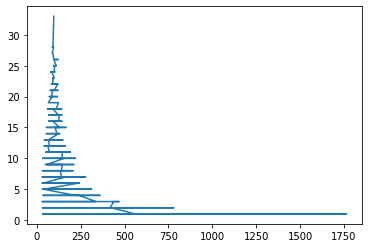

In [12]:
ax=counts.plot()

In [13]:
l=ax.get_lines()[0].get_xydata()

In [14]:
np.shape(l)

(1399, 2)

In [ ]:
l.astype(int)

array([[ 96,  33],
       [ 91,  28],
       [ 87,  28],
       ...,
       [434,   1],
       [478,   1],
       [367,   1]])

In [ ]:
x_data=l[:,0]
y_data=l[:,1]
len(x_data)


1399

In [ ]:
#x_data.astype(int)
#y_data.astype(int)


In [ ]:
x_data=x_data.reshape(-1, 1)

In [15]:
import pandas as pd
data = l

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=12)
model=gmm.fit(data)

In [ ]:
Xnew, Ynew = model.sample(10000)  # if Ynew is valuable


In [ ]:
np.mean(Xnew[:,0])

293.1678655731778

In [ ]:
Xnew

array([[119.24535746,  16.86758287],
       [124.22986521,  10.46930794],
       [103.03586647,  18.04887169],
       ...,
       [212.06624362,   2.0012011 ],
       [486.38218164,   2.00110494],
       [339.7343098 ,   1.9995608 ]])

In [ ]:
t=[1]

[5]


In [16]:
def sample(i):
    flag = True
    while flag:
      Xnew, Ynew = model.sample(i)
      if Xnew[0][0]<0:
         flag=True
     #print(Xnew[0][0])
      else: flag=False
    return(Xnew[0][0])

      


In [37]:
sample(1)

54.76684670838015

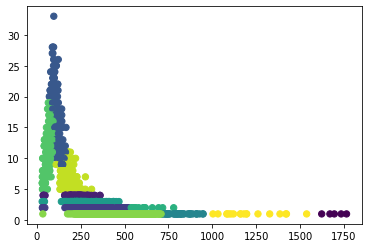

In [18]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=12).fit(l)
labels = gmm.predict(l)
plt.scatter(l[:, 0], l[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(l)
np.shape(probs)

(1399, 12)

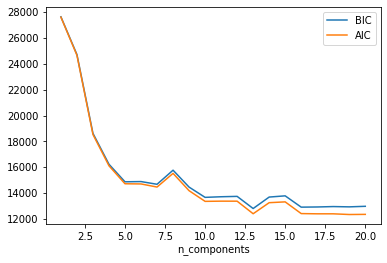

In [ ]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(l)
          for n in n_components]

plt.plot(n_components, [m.bic(l) for m in models], label='BIC')
plt.plot(n_components, [m.aic(l) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
s = np.random.poisson(2, 1000)

In [ ]:
flag = True
while flag:
   s = np.random.poisson(2, 1)
   if s[0]== 0:
     flag=True
     print(s[0])
   else: flag=False
   print(s[0])

3


In [ ]:
## Clickstream generator lists
l=[]## reference list
for i in range(10000):
  flag = True
  while flag:
      s = np.random.poisson(2, 1)
      if s[0]> 0:
        l.append(s[0])
        flag=False
        
      else: flag=True
user_id=[]
k=1
for i in range(len(l)):
  for j in range(l[i]*10):
    user_id.append(k)
  k=k+1
rank=[]
t=[1,2,3,4,5,6,7,8,9,10]
for i in range(len(l)):
  for j in range(l[i]):
    rank=rank+t  


q=[]## click list
for i in range(len(l)):
  for j in range(l[i]):
      r=np.random.poisson(5, 1)
      t=np.random.binomial(1,0.5,size=10)
      min=np.minimum(r,sum(t))
      #print(min)
      j=0
      a=0
      while j < min:
        if t[a]==1:
          j=j+1
          a=a+1
        else: a=a+1
 
      t_=t[0:a]
      t_=t_.tolist()

      for i in range(10-a):
          t_=t_ + [0]
      q=q+t_
click=[]
read_time=[]
for i in range(len(q)):
  if q[i]==0:
     click.append('No')
  else: click.append('Yes')
for i in range(len(q)):
  if q[i]==0:
     read_time.append('NaN')
  else: read_time.append(sample(1))            
article_id=[]
for i in range(len(user_id)):
  article_id.append(np.random.randint(0,7843)) 
#session id
sessionid=[]

for j in l:
  for k in range(j):
      t=k+1
      t_=[t for i in range(10)]
      sessionid=sessionid+t_       
      


In [ ]:
#session id
sessionid=[]

for j in l:
  for k in range(j):
      t=k+1
      t_=[t for i in range(10)]
      sessionid=sessionid+t_
      




In [ ]:
len(sessionid)

2080

In [ ]:
print(l)

[2, 1, 2, 2, 1, 2, 1, 4, 2, 2, 3, 1, 1, 2, 1, 2, 1, 2, 4, 1, 2, 3, 1, 4, 1, 3, 2, 2, 2, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 1, 2, 2, 5, 1, 6, 1, 1, 2, 1, 2, 2, 4, 1, 3, 4, 1, 1, 1, 2, 2, 1, 2, 3, 3, 1, 1, 4, 2, 1, 1, 2, 2, 1, 4, 3, 1, 5, 1, 4, 1, 2, 1, 6, 3, 2, 3, 1, 2, 2, 2]


In [ ]:
sum(l)

208

In [ ]:
len(user_id)

2080

In [ ]:
click_stream

,User_ID,Session_ID,Article_ID,Article_rank,Click,Time_spent
0,1,1,5095,1,No,NaN
1,1,1,4650,2,Yes,546.345
2,1,1,2438,3,Yes,609.483
3,1,1,643,4,No,NaN
4,1,1,3333,5,Yes,303.778
...,...,...,...,...,...,...
230705,10000,3,6173,6,No,NaN
230706,10000,3,1375,7,No,NaN
230707,10000,3,5213,8,No,NaN
230708,10000,3,4959,9,No,NaN


In [ ]:
click_stream.to_csv('clickstream.csv')

In [ ]:
from google.colab import files
files.download("clickstream.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
f=[1 for i in range(5)]

In [ ]:
f

[1, 1, 1, 1, 1]

In [ ]:
q=[]## Rank list
for i in range(len(l)):
  for j in range(l[i]):
      r=np.random.poisson(5, 1)
      t=np.random.binomial(1,0.5,size=10)
      min=np.minimum(r,sum(t))
      #print(min)
      j=0
      a=0
      while j < min:
        if t[a]==1:
          j=j+1
          a=a+1
        else: a=a+1
 
      t_=t[0:a]
      t_=t_.tolist()

      for i in range(10-a):
          t_=t_ + [0]
      q=q+t_    
  







In [ ]:
len(q)
#len(user_id)



 
   


150

In [ ]:
sum(l)

15

In [ ]:
t_.tolist()+[0]

[1, 0, 1, 0]

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
[0]*(9)

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [45]:
df1

,Unnamed: 0,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Length
0,0,0.012674,0.012673,0.873263,0.012674,0.012674,0.012673,0.012673,0.012674,0.012673,0.012673,0.012676,341.0
1,1,0.014407,0.014407,0.855921,0.014409,0.014408,0.014407,0.014407,0.014409,0.014407,0.014407,0.014409,335.0
2,2,0.011484,0.011481,0.011483,0.011482,0.011483,0.011481,0.011481,0.735197,0.011481,0.011481,0.161466,382.0
3,3,0.013694,0.013694,0.624518,0.013697,0.013696,0.013704,0.013694,0.013698,0.013694,0.013694,0.252219,372.0
4,4,0.011252,0.011252,0.436916,0.011253,0.011253,0.011253,0.011252,0.011254,0.011252,0.011252,0.461810,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,7838,0.011291,0.011290,0.011292,0.011292,0.011291,0.011292,0.011290,0.887089,0.011290,0.011290,0.011292,397.0
7839,7839,0.011748,0.011745,0.882542,0.011746,0.011746,0.011745,0.011745,0.011747,0.011745,0.011745,0.011746,500.0
7840,7840,0.013297,0.013297,0.013299,0.013299,0.013298,0.013300,0.013297,0.867018,0.013297,0.013297,0.013299,346.0
7841,7841,0.015510,0.015510,0.015511,0.015512,0.015512,0.383591,0.015510,0.476814,0.015510,0.015510,0.015511,412.0


In [99]:
list1=df1.to_numpy()

In [100]:
list1=list1[0:7843,1:12]
list1[0,:]

array([0.01267389, 0.01267304, 0.87326311, 0.01267383, 0.01267373,
       0.01267309, 0.01267304, 0.0126739 , 0.01267304, 0.01267304,
       0.01267628])

In [101]:
np.shape(list1)

(7843, 11)

In [102]:
article_topic=[]
for i in range(7843):
    list2=list1[i].tolist()
    #print(list2)
    list3=np.copy(list2)
    list3.sort()
    #print(list3)
    max=list3[10]
    article_topic.append(list2.index(max))


In [103]:
print(article_topic)

[2, 2, 7, 2, 10, 2, 2, 4, 4, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 10, 2, 10, 7, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 7, 2, 7, 2, 2, 0, 7, 2, 2, 7, 2, 2, 2, 7, 7, 2, 10, 2, 7, 7, 7, 2, 7, 7, 7, 7, 7, 4, 2, 4, 4, 2, 2, 0, 3, 2, 2, 2, 2, 7, 2, 2, 2, 3, 2, 2, 10, 7, 0, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 3, 2, 10, 2, 2, 7, 7, 2, 2, 2, 2, 2, 7, 7, 2, 7, 2, 2, 4, 4, 2, 4, 4, 3, 4, 3, 2, 4, 4, 7, 4, 3, 7, 2, 7, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 4, 2, 2, 4, 4, 3, 4, 4, 7, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 0, 2, 7, 2, 0, 10, 7, 2, 10, 10, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 2, 10, 2, 7, 2, 2, 2, 2, 2, 2, 10, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 10, 2, 2, 0, 7, 10, 2, 2, 2, 4, 2, 4, 4, 4, 7, 7, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 10, 2, 2, 2, 7, 2, 2, 2, 7, 10, 2, 10, 2, 2, 7, 3, 2, 7, 7, 2, 2, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 2, 2, 10, 2, 2, 2, 2, 0, 2, 7, 2, 2, 3, 10, 10, 7, 7, 2, 2, 10, 2, 2, 

In [108]:
z=[]
for i in range(7843):
  z.append(i)


In [113]:
topic=np.column_stack((article_topic,z))

In [121]:
topic0=[]
topic1=[]
topic2=[]
topic3=[]
topic4=[]
topic5=[]
topic6=[]
topic7=[]
topic8=[]
topic9=[]
topic10=[]
for i in range(7843):
  if topic[i][0]==0:
    topic0.append(topic[i][1])
  elif topic[i][0]==1:
    topic1.append(topic[i][1])
  elif topic[i][0]==2:
    topic2.append(topic[i][1])
  elif topic[i][0]==3:
    topic3.append(topic[i][1])
  elif topic[i][0]==4:
    topic4.append(topic[i][1])
  elif topic[i][0]==5:
    topic5.append(topic[i][1])
  elif topic[i][0]==6:
    topic6.append(topic[i][1])
  elif topic[i][0]==7:
    topic7.append(topic[i][1])
  elif topic[i][0]==8:
    topic8.append(topic[i][1])
  elif topic[i][0]==9:
    topic9.append(topic[i][1])
  elif topic[i][0]==10:
    topic10.append(topic[i][1])                    

In [129]:
#empty arrays 1,6,8,9

[]

In [169]:
article_id=[]
for i in range(len(l)):
  for j in range(l[i]):
     for p1 in range(3):
        article_id.append(random.choice(topic4))
     for p2 in range(2):
        article_id.append(random.choice(topic7))
     article_id.append(random.choice(topic0))
     article_id.append(random.choice(topic2))
     article_id.append(random.choice(topic3))
     article_id.append(random.choice(topic5))
     article_id.append(random.choice(topic10))  







In [173]:
print(article_id)

[1633, 3981, 4024, 5145, 64, 44, 1425, 7419, 7574, 6233, 3270, 3938, 4024, 4001, 2896, 2103, 1452, 7505, 7529, 1124, 133, 3998, 3414, 4495, 2535, 1837, 7472, 4839, 7138, 6245, 3762, 3950, 3887, 4509, 4359, 832, 1750, 7431, 6365, 6291, 3666, 1735, 1047, 4071, 7790, 532, 4711, 6425, 7764, 1948, 2327, 289, 3831, 4346, 6077, 532, 4609, 3008, 7764, 5019, 3930, 3399, 1906, 4015, 2028, 1342, 5161, 2513, 7831, 6272, 3313, 3350, 4036, 1573, 2583, 44, 5568, 5049, 7188, 6275, 4026, 795, 3282, 7804, 6775, 1117, 5068, 5034, 7429, 1068, 709, 3398, 3423, 2911, 5441, 392, 665, 5388, 7618, 1759, 1973, 4049, 3324, 548, 6281, 922, 1246, 6055, 7102, 6256, 3142, 4048, 1043, 4393, 6126, 6932, 1453, 7145, 7663, 198, 3801, 3384, 3233, 1812, 2666, 6537, 4681, 7119, 7024, 4756, 3284, 3270, 3249, 1269, 4298, 6991, 2374, 6103, 5627, 626, 1173, 2195, 3589, 6795, 3812, 5274, 5128, 7511, 7417, 5291, 3221, 3666, 3956, 516, 7534, 922, 356, 7237, 7109, 1167, 3490, 4027, 1178, 4590, 6872, 1877, 4672, 7363, 7499, 1243, 3

In [177]:
topic5.index(7574)

21

2

# FInalized

In [178]:
## Clickstream generator lists
l=[]## reference list
for i in range(10000):
  flag = True
  while flag:
      s = np.random.poisson(1, 1)
      if s[0]> 0:
        l.append(s[0])
        flag=False
        
      else: flag=True
user_id=[]
k=1
for i in range(len(l)):
  for j in range(l[i]*10):
    user_id.append(k)
  k=k+1
rank=[]
t=[1,2,3,4,5,6,7,8,9,10]
for i in range(len(l)):
  for j in range(l[i]):
    rank=rank+t  


q=[]## click list
for i in range(len(l)):
  for j in range(l[i]):
      r=np.random.poisson(3, 1)
      t=np.random.binomial(1,0.5,size=10)
      min=np.minimum(r,sum(t))
      #print(min)
      j=0
      a=0
      while j < min:
        if t[a]==1:
          j=j+1
          a=a+1
        else: a=a+1
 
      t_=t[0:a]
      t_=t_.tolist()

      for i in range(10-a):
          t_=t_ + [0]
      q=q+t_
click=[]
read_time=[]
for i in range(len(q)):
  if q[i]==0:
     click.append('No')
  else: click.append('Yes')
for i in range(len(q)):
  if q[i]==0:
     read_time.append('NaN')
  else: read_time.append(sample(1))            
#session id
sessionid=[]

for j in l:
  for k in range(j):
      t=k+1
      t_=[t for i in range(10)]
      sessionid=sessionid+t_  
article_id=[]
for i in range(len(l)):
  for j in range(l[i]):
     for p1 in range(3):
        article_id.append(random.choice(topic4))
     for p2 in range(2):
        article_id.append(random.choice(topic7))
     article_id.append(random.choice(topic0))
     article_id.append(random.choice(topic2))
     article_id.append(random.choice(topic3))
     article_id.append(random.choice(topic5))
     article_id.append(random.choice(topic10))             
      


In [179]:
click_stream = pd.DataFrame(
    {'User_ID': user_id,
     'Session_ID':sessionid ,
     'Article_ID': article_id,
     'Article_rank': rank,
     'Click': click,
     'Time_spent': read_time
                          })

In [180]:
click_stream

,User_ID,Session_ID,Article_ID,Article_rank,Click,Time_spent
0,1,1,3481,1,No,NaN
1,1,1,3802,2,No,NaN
2,1,1,489,3,Yes,49.2641
3,1,1,5361,4,Yes,41.4132
4,1,1,2084,5,No,NaN
...,...,...,...,...,...,...
158075,10000,2,2063,6,Yes,204.065
158076,10000,2,79,7,Yes,435.165
158077,10000,2,2882,8,No,NaN
158078,10000,2,6365,9,Yes,415.022


In [181]:
click_stream.to_csv('clickstream.csv')

In [182]:
from google.colab import files
files.download("clickstream.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
sum(l)

15808